# Waveguides - Ex8

### Ronen shekel

### ID 309987493 

In [35]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib ipympl
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import Axes3D 

# Q1
* Given a rectangular waveguide, find $\kappa_x, \kappa_y, \gamma_x, \gamma_y$, and also $\beta$ according to both Marcatili and Kumar. 
* We find solutions for $\kappa_x$ only for p=1,2, and q=1,2. 
* However, we find that the mode for q=2, p=2 is not guided from the condition of $k_0 \cdot n_0 < \beta < k_0 \cdot n_1$. However, after the correction to $\beta$ by Kumar, it seems that all four modes are guided.
    * This is further verified (at the end) by looking at the b parameter, and seeing that according to Marcitelli the (2,2) b parameter comes out negative, but not according to Kumar. 
* Ex has two contibutions, one proportional to Hy, and one to its second derivative. We show numerically that the second contribution is negligent (more than 10 orders of magnitude smaller) so don't calculate it, and for drawing Ex we use the expression for Hy. For Ex in the corners we assume a double exponential decay, though we did not really discuss this in class. 

In [36]:
a = 2.5e-6
d = 3e-6 
n1 = 1.5
n0 = 1.47
wl = 1.55e-6
k0 = 2*np.pi/wl 

eps = np.finfo(float).eps

def get_kappa_gamma_x(a, p, n0, n1, k0, initial_guesses=0, plot=True):
    def gamma(kappa_x):
        return np.sqrt(k0**2*(n1**2-n0**2) - kappa_x**2)
    RHS = lambda k: (p-1)*(np.pi/2) + np.arctan((n1**2*gamma(k)) / (n0**2*k + eps))  # eps to not divide by zero 
    diff_func = lambda k: RHS(k) - k*a
    
    if plot:
        fig, ax = plt.subplots()
        X = np.linspace(0, np.sqrt(k0**2*(n1**2-n0**2)) - eps, 1000)
        ax.plot(X, RHS(X))
        ax.plot(X, X*a)
    
    kappa_x = fsolve(diff_func, initial_guesses, xtol=1e-12, maxfev=5000)
    gamma_x = gamma(kappa_x)
    return kappa_x[0], gamma_x[0]

def get_kappa_gamma_y(d, q, n0, n1, k0, initial_guesses=0, plot=False):
    def gamma(kappa_y):
        return np.sqrt(k0**2*(n1**2-n0**2) - kappa_y**2)
    RHS = lambda k: (q-1)*(np.pi/2) + np.arctan(gamma(k) / (k + eps))  # eps to not divide by zero 
    diff_func = lambda k: RHS(k) - k*d
    
    if plot:
        fig, ax = plt.subplots()
        X = np.linspace(0, np.sqrt(k0**2*(n1**2-n0**2)), 1000)
        ax.plot(X, RHS(X))
        ax.plot(X, X*a)
    
    kappa_y = fsolve(diff_func, initial_guesses, xtol=1e-12, maxfev=5000)
    gamma_y = gamma(kappa_y)
    return kappa_y[0], gamma_y[0]

### get $\kappa_x$s and $\gamma_x$s

In [37]:
kappa_xs = []
gamma_xs = []

for p in [1, 2]:
    x0 = 0.5*p/a  # initial guess, but a bit smaller so we won't get to bad regime 
    kx, gx = get_kappa_gamma_x(a, p, n0, n1, k0, x0, False)
    kappa_xs.append(kx)
    gamma_xs.append(gx)
print(f'{kappa_xs=}')
print(f'{gamma_xs=}')

kappa_xs=[473300.3012259952, 919414.5482063676]
gamma_xs=[1113596.8582268092, 786630.806884474]


### get $\kappa_y$s and $\gamma_y$s

In [38]:
kappa_ys = []
gamma_ys = []

for q in [1, 2]:
    x0 = 0.5*q/d
    ky, gy = get_kappa_gamma_y(d, q, n0, n1, k0, x0, False)
    kappa_ys.append(ky)
    gamma_ys.append(gy)
print(f'{kappa_ys=}')
print(f'{gamma_ys=}')

kappa_ys=[408739.3343813237, 804687.0677512473]
gamma_ys=[1138878.0858031954, 903653.6177026777]


### get $\beta$s

In [39]:
betas = np.zeros((len(kappa_xs), len(kappa_ys)))
for i in range(len(kappa_xs)):
    for j in range(len(kappa_ys)):
        betas[i, j] = np.sqrt(k0**2*n1**2 - kappa_xs[i]**2 - kappa_ys[j]**2)
print(f'{betas=}')

betas=array([[6048257.80378251, 6008408.19414597],
       [5996675.12249106, 5956480.4281696 ]])


### Check which betas will be guided 

In [40]:
for beta in betas.flatten():
    if not(k0*n0 < beta and beta < k0*n1):
        print(f'{beta=:.5f} not good solution')

beta=5956480.42817 not good solution


In [41]:
q = 2
p = 2
np.sqrt(k0**2*n1**2 - kappa_xs[p-1]**2 - kappa_ys[q-1]**2)

5956480.4281696025

### $\beta$s Kumar

In [42]:
betas_kumar = np.zeros((len(kappa_xs), len(kappa_ys)))
for i in range(len(kappa_xs)):
    for j in range(len(kappa_ys)):
        betas_kumar[i, j] = np.sqrt(k0**2*n1**2 - kappa_xs[i]**2 - kappa_ys[j]**2)
        p = i + 1
        q = j + 1
        phi = (p - 1)*np.pi/2
        psi = (q - 1)*np.pi/2
        beta1_sqr = (k0**2*(n1**2-n0**2)*(np.cos(kappa_xs[i]*a-phi))**2*(np.cos(kappa_ys[j]*d - psi))**2) / ((1 + gamma_xs[i]*a) * (1 + gamma_ys[j]*d))
        betas_kumar[i, j] = np.sqrt(betas_kumar[i, j]**2 + beta1_sqr)

print(f'{betas_kumar=}')

for beta in betas_kumar.flatten():
    if not(k0*n0 < beta and beta < k0*n1):
        print(f'{beta=:.5f} not good solution')

betas_kumar=array([[6048375.83037812, 6008956.22046691],
       [5997267.84632161, 5959232.50514255]])


In [43]:
print(f'{k0*n0=}')
print(f'{k0*n1=}')

k0*n0=5958891.871970317
k0*n1=6080501.910173793


### Assert the second derivative factor is negligible. 

In [44]:
eps0 = 8.854e-12
mu0 = 4*np.pi*1e-7
c = 3e8
omega = c*k0 
beta = betas[0, 0]  # They are all the saae order of magnitude 
kappa_x = kappa_xs[0]  # They are all the saae order of magnitude
# SEcond derivative gives a factor of kappa_x 
prefactor_DXX = kappa_x**2/omega*eps0*beta

prefactor_main = omega*mu0/beta
print(f'{prefactor_DXX=}')
print(f'{prefactor_main=}')

prefactor_DXX=9.864474373991942e-09
prefactor_main=252.6672737950321


### Draw $E_x$ 
Which is pesky, since we need to do this separately for different regions 

In [45]:
def Ex_mode_kumar(X, Y, p, q, kappa_x, kappa_y, gamma_x, gamma_y, a, d):   
    # phi, psi shift based on p,q
    phi = (p - 1)*np.pi/2
    psi = (q - 1)*np.pi/2
    ExField = np.zeros_like(X, dtype=complex)

    # core region
    ic = (np.abs(X) <= a) & (np.abs(Y) <= d)
    ExField[ic] = np.cos(kappa_x[p-1]*X[ic] - phi) * np.cos(kappa_y[q-1]*Y[ic] - psi)

    # above core
    uY = (np.abs(X) <= a) & (Y > d)
    ExField[uY] = np.cos(kappa_x[p-1]*X[uY] - phi) * np.cos(kappa_y[q-1]*d - psi) \
                  * np.exp(-gamma_y[q-1] * (Y[uY] - d))

    # below core
    lY = (np.abs(X) <= a) & (Y < -d)
    ExField[lY] = np.cos(kappa_x[p-1]*X[lY] - phi) * np.cos(kappa_y[q-1]*d - psi) \
                  * np.exp(-gamma_y[q-1] * (-d - Y[lY]))

    # right side
    rX = (X > a) & (np.abs(Y) <= d)
    ExField[rX] = np.cos(kappa_x[p-1]*a - phi) * np.cos(kappa_y[q-1]*Y[rX] - psi) \
                  * np.exp(-gamma_x[p-1] * (X[rX] - a))

    # left side
    lX = (X < -a) & (np.abs(Y) <= d)
    ExField[lX] = np.cos(kappa_x[p-1]*a - phi) * np.cos(kappa_y[q-1]*Y[lX] - psi) \
                  * np.exp(-gamma_x[p-1] * (-a - X[lX]))

    # corners
    c1 = (X > a) & (Y > d)
    ExField[c1] = np.cos(kappa_x[p-1]*a - phi) * np.cos(kappa_y[q-1]*d - psi) \
                  * np.exp(-gamma_x[p-1] * (X[c1] - a)) * np.exp(-gamma_y[q-1] * (Y[c1] - d))

    c2 = (X > a) & (Y < -d)
    ExField[c2] = np.cos(kappa_x[p-1]*a - phi) * np.cos(kappa_y[q-1]*d - psi) \
                  * np.exp(-gamma_x[p-1] * (X[c2] - a)) * np.exp(-gamma_y[q-1] * (-d - Y[c2]))

    c3 = (X < -a) & (Y > d)
    ExField[c3] = np.cos(kappa_x[p-1]*a - phi) * np.cos(kappa_y[q-1]*d - psi) \
                  * np.exp(-gamma_x[p-1] * (-a - X[c3])) * np.exp(-gamma_y[q-1] * (Y[c3] - d))

    c4 = (X < -a) & (Y < -d)
    ExField[c4] = np.cos(kappa_x[p-1]*a - phi) * np.cos(kappa_y[q-1]*d - psi) \
                  * np.exp(-gamma_x[p-1] * (-a - X[c4])) * np.exp(-gamma_y[q-1] * (-d - Y[c4]))
    
    ExField /= np.sqrt((np.abs(ExField)**2).sum())

    return ExField

def plot_Ex_mode(X, Y, ExField, a, d, title=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

    c = ax1.contourf(X, Y, np.abs(ExField)**2, 50, cmap='jet')
    plt.colorbar(c, ax=ax1)
    ax1.add_patch(plt.Rectangle((-a, -d), 2*a, 2*d, facecolor='gray', alpha=0.5))
    ax1.set_aspect('equal')
    ax1.set_title(title)

    # 3D surface of intensity
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(X, Y, np.abs(ExField)**2, cmap='jet', linewidth=0)
    ax2.set_title(title)

    plt.tight_layout()
    plt.show()


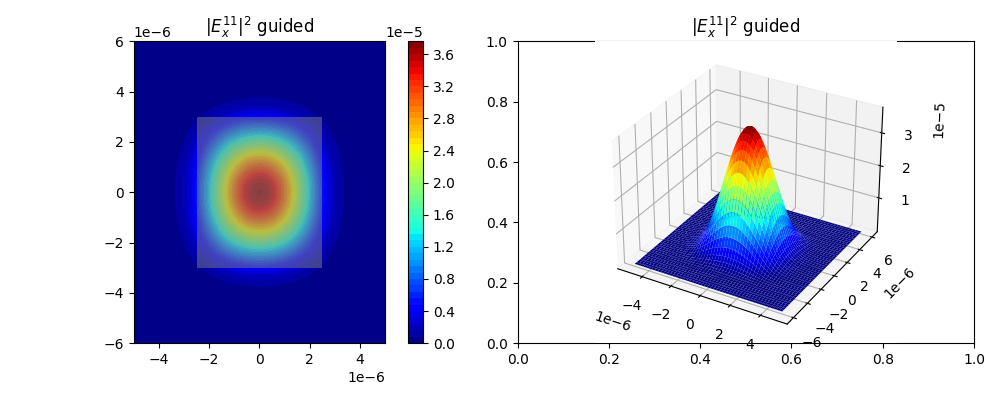

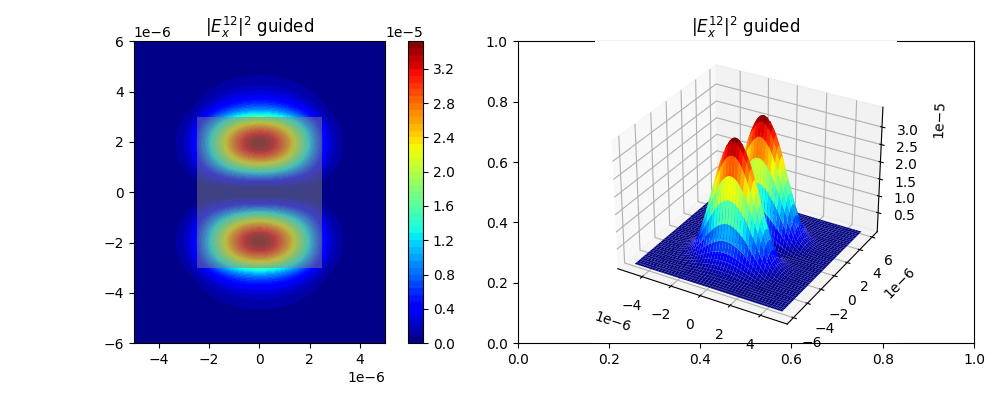

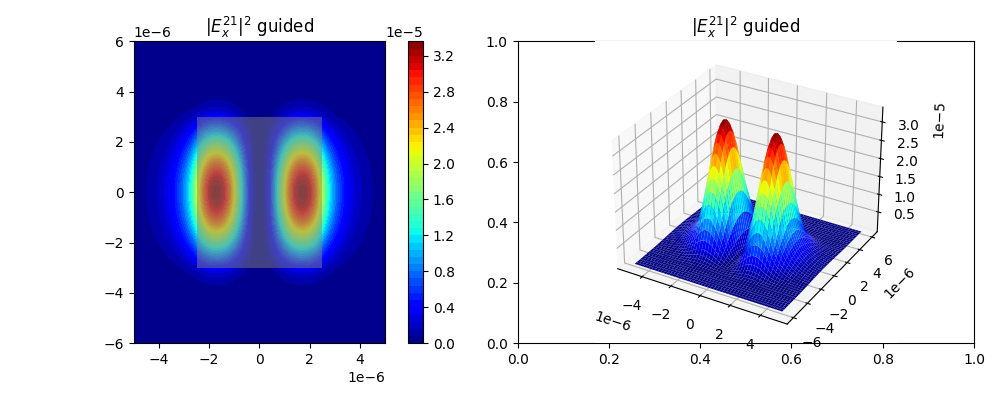

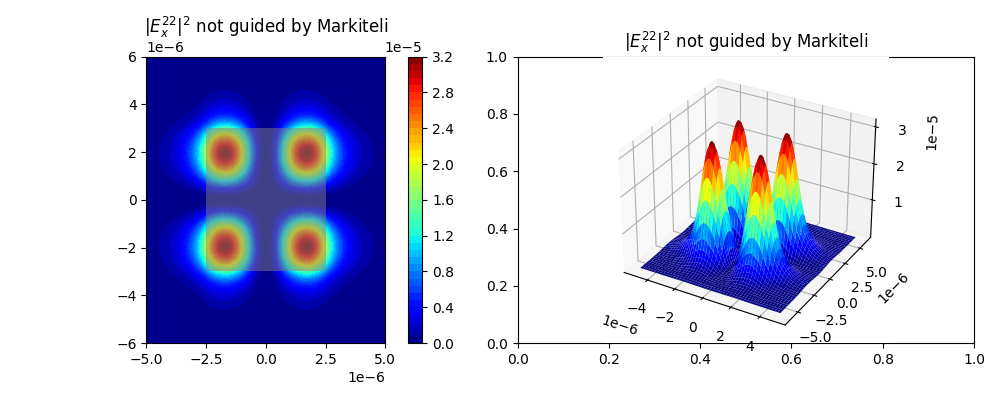

In [47]:
x_vals = np.linspace(-2*a, 2*a, 500)
y_vals = np.linspace(-2*d, 2*d, 500)
X, Y = np.meshgrid(x_vals, y_vals)

plt.close('all')
for (p, q) in [(1, 1), (1,2), (2,1), (2,2)]:
    E = Ex_mode_kumar(X, Y, p, q, kappa_xs, kappa_ys, gamma_xs, gamma_ys, a, d)

    guided_str = ''
    if p == 2 and q == 2:
        guided_str = 'not guided by Markiteli'
    else:
        guided_str = 'guided'
    title = rf"$|E_x^{{{p}{q}}}|^2$ {guided_str}"
    plot_Ex_mode(X, Y, E, a, d, title)

### Find the b parameter from $n_{eff}$.   

In [48]:
n_effs = betas/k0
b_param = (n_effs**2 - n0**2) / (n1**2 - n0**2)
print(f'{b_param=}')

n_effs_kumar = betas_kumar/k0
b_param_kumar = (n_effs_kumar**2 - n0**2) / (n1**2 - n0**2)
print(f'{b_param_kumar=}') 

b_param=array([[ 0.73288843,  0.40473477],
       [ 0.30852862, -0.01962505]])
b_param_kumar=array([[0.73386358, 0.40923295],
       [0.31338419, 0.00277281]])


# Q2
## A
We once again find the $\kappa, \gamma$ values, and calculate the first mode for different $h$ values of 4,5,6,7,8 $\mu m$, where $h$ is the size of a side of the waveguide. We then calculate the overlap with a Gaussian mode of a single-mode fiber. We find the overlap becomes better for larger values of $h$. However - the amount of modes in the waveguide grows with $h$, so when designing a waveguide that a SM fiber needs to be copuled into there is a tradeoff between the existance of several modes and the coupling efficiency.    

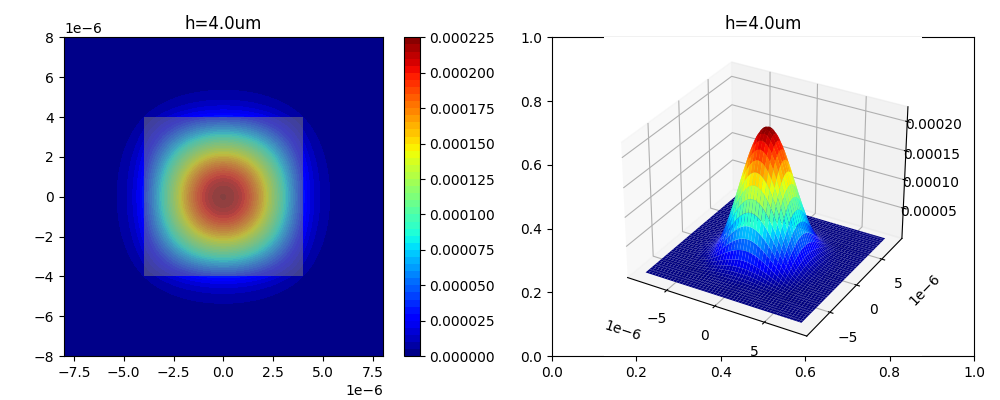

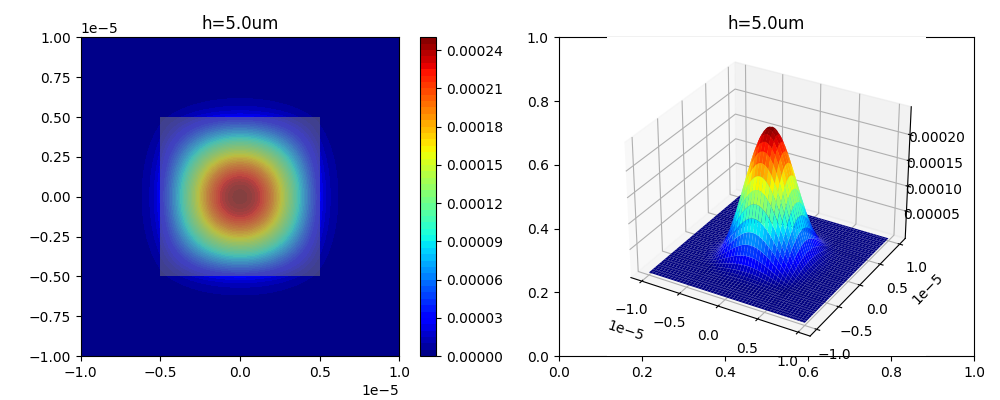

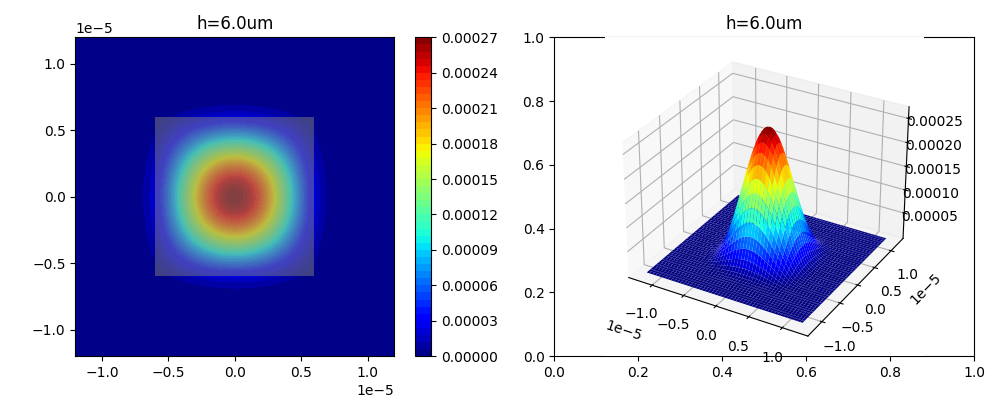

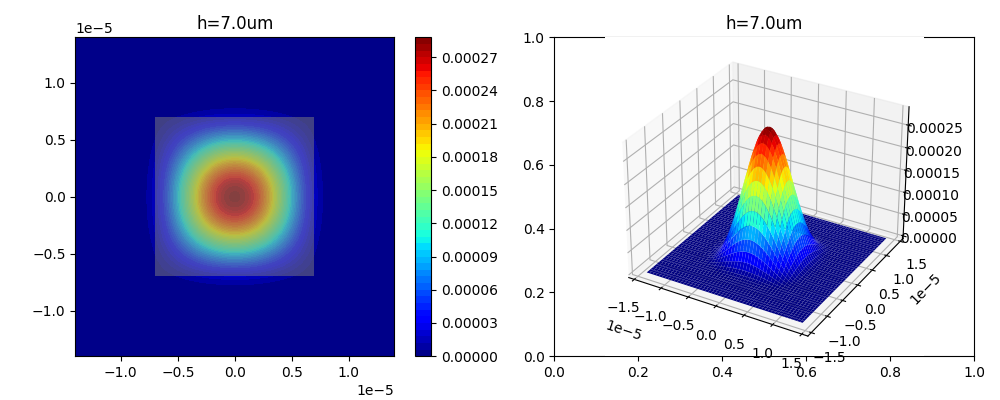

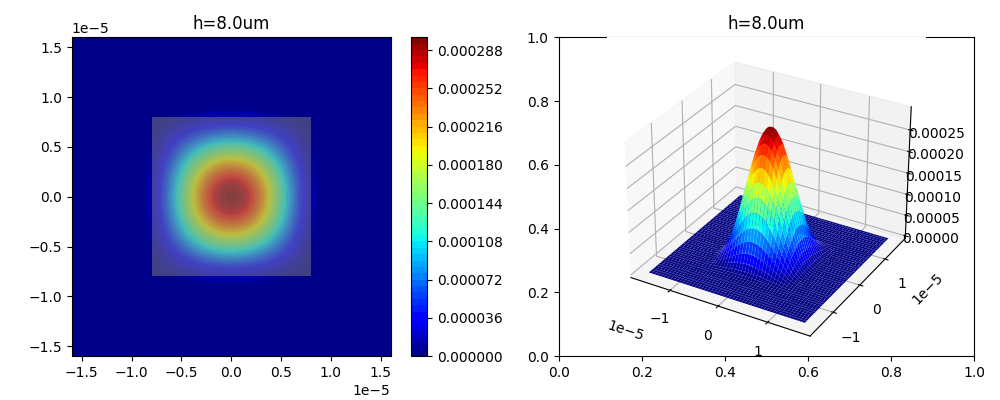

In [51]:
hs = np.arange(4,9) * 1e-6
n0 = 1.458
n1 = 1.47 
wl = 1.55e-6 
k0 = 2*np.pi/wl 

etas = np.zeros_like(hs, dtype=np.complex64)
# Create fiber mode 
x_vals = np.linspace(-2*hs.max(), 2*hs.max(), 200)
y_vals = np.linspace(-2*hs.max(), 2*hs.max(), 200)
X, Y = np.meshgrid(x_vals, y_vals)
R = np.sqrt(X**2 + Y**2)
waist = 5.25e-6 
fiber_mode = np.exp(-R**2/(waist**2))
fiber_mode /= np.sqrt((np.abs(fiber_mode)**2).sum())
# print((np.abs(fiber_mode)**2).sum())  # check normalization 

for i, h in enumerate(hs):
    p = 1 
    q = 1 
    x0 = 0 # 0.5/h 
    kappa_x, gamma_x = get_kappa_gamma_x(h, p, n0, n1, k0, x0, False)
    kappa_y, gamma_y = get_kappa_gamma_y(h, q, n0, n1, k0, x0, False)
    
    x_vals = np.linspace(-2*h, 2*h, 200)
    y_vals = np.linspace(-2*h, 2*h, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    E = Ex_mode_kumar(X, Y, p, q, [kappa_x], [kappa_y], [gamma_x], [gamma_y], h, h)
    # print((np.abs(E)**2).sum())  # check normalization 
    title = f'h={h*1e6:.1f}um'
    plot_Ex_mode(X, Y, E, h, h, title)
    
    etas[i] = (fiber_mode * E.conj()).sum()

hs=array([4.e-06, 5.e-06, 6.e-06, 7.e-06, 8.e-06])
np.abs(etas)**2=array([0.8206154 , 0.86559504, 0.89258   , 0.90997213, 0.9218433 ],
      dtype=float32)


Text(0, 0.5, '$\\eta^2$')

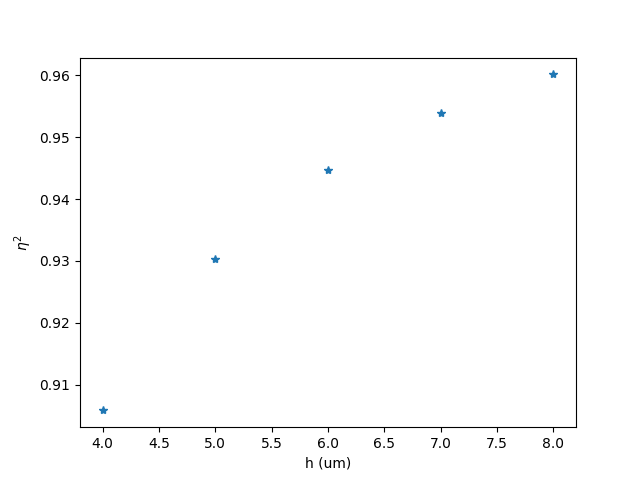

In [52]:
print(f'{hs=}')
print(f'{np.abs(etas)**2=}')
fig, ax = plt.subplots()
ax.plot(hs * 1e6, np.abs(etas), '*')
ax.set_xlabel('h (um)')
ax.set_ylabel('$\eta^2$')    